In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from genetic_program import FitnessFunction
from gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript
from chart_plotter import DogeDNACanvas

%matplotlib inline
pd.set_option('display.max_columns', 500)

class WowFitnessFunction(FitnessFunction):
    _name = "ff_sowow"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent * evaluation.num_sells,

class BenchmarkDiffFitnessFunction(FitnessFunction):
    _name = "ff_benchmarkdiff"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent - evaluation.benchmark_backtest.profit_percent,

class BenchmarkDiff2FitnessFunction(FitnessFunction):
    _name = "ff_benchmarkdiff2"

    def compute(self, individual, evaluation, genetic_program):
        return (evaluation.profit_percent - evaluation.benchmark_backtest.profit_percent)*evaluation.num_profitable_trades,
    
    
experiment_json = {
    "training_data": [
        {
        "transaction_currency": "BTC",
        "counter_currency": "USDT",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "DOGE",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/06/01 00:00:00 UTC",
        "end_time": "2018/08/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        }
    ],

    "validation_data": [{
        "transaction_currency": "ETH",
        "counter_currency": "BTC",
        "start_time": "2018/06/01 00:00:00 UTC",
        "end_time": "2018/08/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
    }],

    "fitness_functions": ["ff_benchmarkdiff", "ff_v1"],
    "grammar_version": "gv3",
    "num_generations": 10,

    "mating_probabilities": [
        0.9
    ],

    "mutation_probabilities": [
        0.5
    ],

    "population_sizes": [
        500
    ]
}

e = ExperimentManager(experiment_json, read_from_file=False)
e.run_experiments(display_results=False)


INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...
INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_v1;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...


### Looking at performance per training dataset and across all experiment variants
For each training dataset in the training collection, we get a performance dataframe sorted by profit. The dataframes and best individuals in them are shown below.

Experiment id: run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10



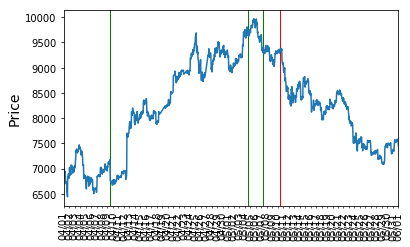

String representation:
if_then_else(gt(ema200(ARG0), ema50(ARG0)), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 87.68591911278607), if_then_else(False, buy, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 5.204650283648808), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(False, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(91.65447368067163, ema50(ARG0)), if_then_else(lt(72.65096031503073, 15.492839530224595), if_then_else(True, buy, sell), if_then_else(True, buy, buy)), if_then_else(identity_bool(False), if_then_else(Tru

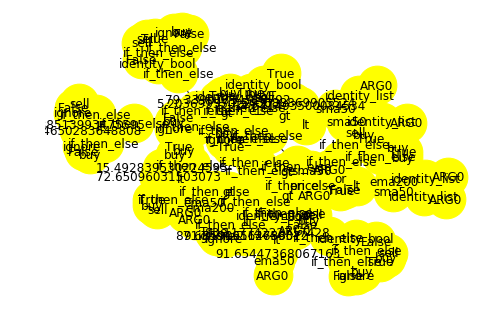

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 11:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.140890 BTC 	 (1 BTC = 7080.00000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 11:00:00 rsi_value=None
2018-05-04 14:02:00  	 OrderType.SELL   	 cash_balance ->       1369.14 USDT 	 currency_balance ->     -0.140890 BTC 	 (1 BTC = 9742.19299917 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-04 14:02:00 rsi_value=None
2018-05-04 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1369.14 USDT 	 currency_balance ->      0.141652 BTC 	 (1 BTC = 9641.36998356 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-04 15:00:00 rsi_value=None
2018-05-07 09:00:00  	 OrderType.SELL   	 cash_balance ->       1313.3

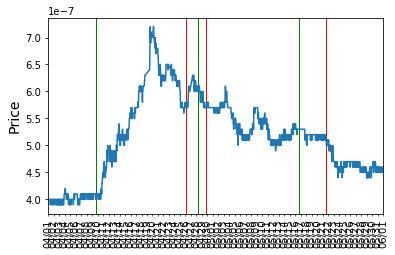

String representation:
if_then_else(gt(ema200(identity_list(identity_list(ARG0))), sma200(identity_list(identity_list(ARG0)))), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 71.17395197374101), if_then_else(False, ignore, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 13.955523994837842), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(True, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(rsi(ARG0), ema50(ARG0)), ignore, if_then_else(identity_bool(False), if_then_else(True, buy, sell), if_then_else(False, ignore, buy))), if_

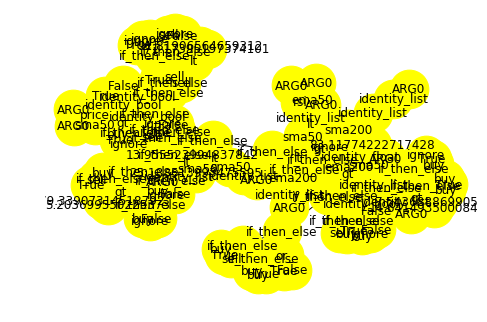

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 19:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 2493750000.000000 DOGE 	 (1 DOGE = 0.00000040 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 19:00:00 rsi_value=None
2018-04-26 03:00:00  	 OrderType.SELL   	 cash_balance ->       1417.88 BTC 	 currency_balance -> -2493750000.000000 DOGE 	 (1 DOGE = 0.00000057 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-26 03:00:00 rsi_value=None
2018-04-28 09:00:00  	 OrderType.BUY    	 cash_balance ->      -1417.88 BTC 	 currency_balance -> 2357231994.140626 DOGE 	 (1 DOGE = 0.00000060 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-28 09:00:00 rsi_value=None
2018-04-29 16:00:00  	 OrderType.SELL   	 cash_balance ->       134

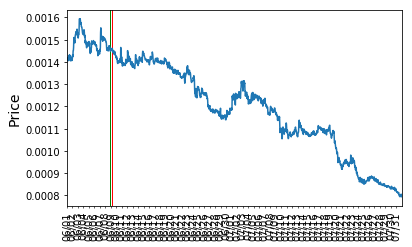

String representation:
if_then_else(gt(ema200(identity_list(identity_list(ARG0))), sma200(identity_list(identity_list(ARG0)))), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 71.17395197374101), if_then_else(False, ignore, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 13.955523994837842), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(True, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(rsi(ARG0), ema50(ARG0)), ignore, if_then_else(identity_bool(False), if_then_else(True, buy, sell), if_then_else(False, ignore, buy))), if_

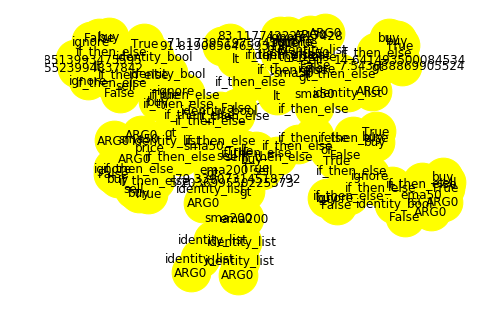

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-08 20:07:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 681701.691440 OMG 	 (1 OMG = 0.00146325 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-08 20:07:00 rsi_value=None
2018-06-09 07:03:00  	 OrderType.SELL   	 cash_balance ->        988.04 BTC 	 currency_balance -> -681701.691440 OMG 	 (1 OMG = 0.00145300 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-06-09 07:03:00 rsi_value=None
End time: 2018-08-01 00:00:00

Summary
--
Number of trades: 2
End cash: 988.04 BTC
End crypto: 0.000000 OMG
End price: 0.00079397
Total value invested: 1000 BTC
Total value after investment: 988.04 BTC (-1.20%)
Profit: -11.96 BTC
Total value invested: 7485000.00 USDT (conversion on 2018-06-01 00:00:00)
Total value after investment: 7655620.83 

In [2]:
performance_dfs = e.get_joined_performance_dfs_over_all_variants()

We can explore each of the performance dataframes in more detail.

In [3]:
performance_dfs[1]

,abc_negative_cache_version,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
0,54,0.035345,11.634848,24.286563,0.456713,DOGE,1283.246836,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1283.246836,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1283.246836,9.605103e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,0,[<deap.gp.Primitive object at 0x00000292AF7ADB...,0.421438,-0.040142,0.421438,-0.297556,2462400.0,0.421438,-0.046258,0.109640,0.421438,-0.052375,-0.052375,3,3,1,2,6,1,3,6,2,0.333333,283.246836,28.324684,38.802060,2.685103e+06,60,0.351381,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.006117,0.220530,0,0.0025,DOGE,False
7,54,0.034875,11.634848,24.286563,0.414763,DOGE,1273.912135,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1273.912135,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1273.912135,9.535232e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,7,[<deap.gp.Primitive object at 0x00000292AF7ADB...,0.386768,-0.035750,0.386768,-0.272760,2448000.0,0.386768,-0.037946,0.103626,0.386768,-0.040142,-0.040142,3,3,1,2,6,1,3,6,2,0.333333,273.912135,27.391214,37.792375,2.615232e+06,60,0.352478,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.002196,0.200220,0,0.0025,DOGE,False
8,54,0.034875,11.634848,24.286563,0.414763,DOGE,1273.912135,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1273.912135,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1273.912135,9.535232e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,8,[<deap.gp.Primitive object at 0x00000292AF7ADB...,0.386768,-0.035750,0.386768,-0.272760,2448000.0,0.386768,-0.037946,0.103626,0.386768,-0.040142,-0.040142,3,3,1,2,6,1,3,6,2,0.333333,273.912135,27.391214,37.792375,2.615232e+06,60,0.352478,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.002196,0.200220,0,0.0025,DOGE,False
9,54,0.034875,11.634848,24.286563,0.414763,DOGE,1273.912135,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1273.912135,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1273.912135,9.535232e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,9,[<deap.gp.Primitive object at 0x00000292AF7ADB...,0.386768,-0.035750,0.386768,-0.272760,2448000.0,0.386768,-0.037946,0.103626,0.386768,-0.040142,-0.040142,3,3,1,2,6,1,3,6,2,0.333333,273.912135,27.391214,37.792375,2.615232e+06,60,0.352478,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.002196,0.200220,0,0.0025,DOGE,False
6,54,0.034875,11.634848,24.286563,0.414763,DOGE,1273.912135,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1273.912135,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1273.912135,9.535232e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,6,[<deap.gp.Primitive object at 0x00000292AF7ADB...,0.386768,-0.035750,0.386768,-0.272760,2448000.0,0.386768,-0.037946,0.103626,0.386768,-0.040142,-0.040142,3,3,1,2,6,1,3,6,2,0.333333,273.912135,27.391214,37.792375,2.6

Experiment id: run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10



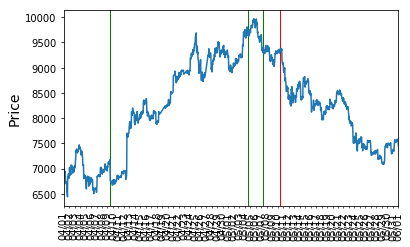

String representation:
if_then_else(gt(ema200(ARG0), ema50(ARG0)), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 87.68591911278607), if_then_else(False, buy, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 5.204650283648808), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(False, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(91.65447368067163, ema50(ARG0)), if_then_else(lt(72.65096031503073, 15.492839530224595), if_then_else(True, buy, sell), if_then_else(True, buy, buy)), if_then_else(identity_bool(False), if_then_else(Tru

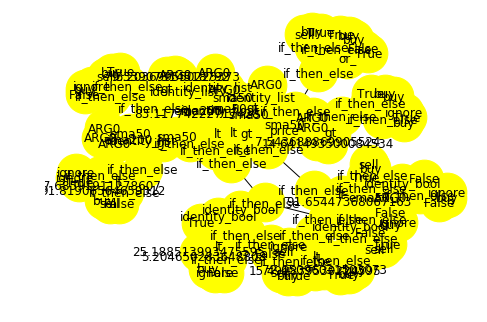

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 11:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.140890 BTC 	 (1 BTC = 7080.00000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 11:00:00 rsi_value=None
2018-05-04 14:02:00  	 OrderType.SELL   	 cash_balance ->       1369.14 USDT 	 currency_balance ->     -0.140890 BTC 	 (1 BTC = 9742.19299917 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-04 14:02:00 rsi_value=None
2018-05-04 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1369.14 USDT 	 currency_balance ->      0.141652 BTC 	 (1 BTC = 9641.36998356 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-04 15:00:00 rsi_value=None
2018-05-07 09:00:00  	 OrderType.SELL   	 cash_balance ->       1313.3

In [4]:
e.performance_df_row_info(performance_dfs[0].iloc[0])

### Best performing individuals across all variants and dataset
Each experiment variant will have a winner, the doge baby that had the best fitness value. We can get these winners by invoking the command below:

In [5]:
best_individuals_across_variants_and_datasets = e.get_best_performing_across_variants_and_datasets(e.training_data)

In [6]:
best_individuals_across_variants_and_datasets



,experiment_name,doge,fitness,mean_profit,std_profit,max_profit,min_profit,variant,evaluations,individual,all_profits
0,run_evolution.data_BTC-USDT-1522540800.0-15278...,if_then_else(gt(ema200(identity_list(identity_...,11.487737,14.438855,12.115238,28.324684,-1.196372,Experiment run_evolution.data_BTC-USDT-1522540...,[<backtester_ticks.TickDrivenBacktester object...,[<deap.gp.Primitive object at 0x00000292B69391...,"16.188253850765, 28.324683645679897, -1.196372..."
1,run_evolution.data_BTC-USDT-1522540800.0-15278...,"if_then_else(lt(price(ARG0), ema50(ARG0)), sel...",203.321926,-52.823450,31.721408,-11.019638,-87.821545,Experiment run_evolution.data_BTC-USDT-1522540...,[<backtester_ticks.TickDrivenBacktester object...,[<deap.gp.Primitive object at 0x00000292B69445...,"-11.019637687150055, -87.82154541159021, -59.6..."


### How did this individual perform on training sets?

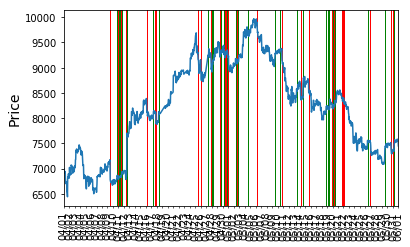

String representation:
if_then_else(lt(price(ARG0), ema50(ARG0)), sell, buy)



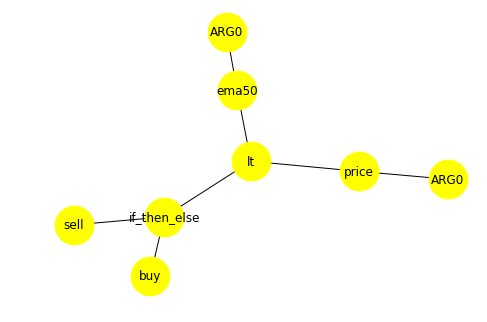

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 11:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.140890 BTC 	 (1 BTC = 7080.00000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 11:00:00 rsi_value=None
2018-04-09 12:00:00  	 OrderType.SELL   	 cash_balance ->        953.14 USDT 	 currency_balance ->     -0.140890 BTC 	 (1 BTC = 6782.08841575 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-09 12:00:00 rsi_value=None
2018-04-10 17:00:00  	 OrderType.BUY    	 cash_balance ->       -953.14 USDT 	 currency_balance ->      0.139221 BTC 	 (1 BTC = 6829.10000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-10 17:00:00 rsi_value=None
2018-04-11 00:00:00  	 OrderType.SELL   	 cash_balance ->        942.9

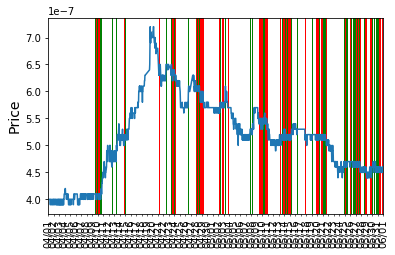

String representation:
if_then_else(lt(price(ARG0), ema50(ARG0)), sell, buy)



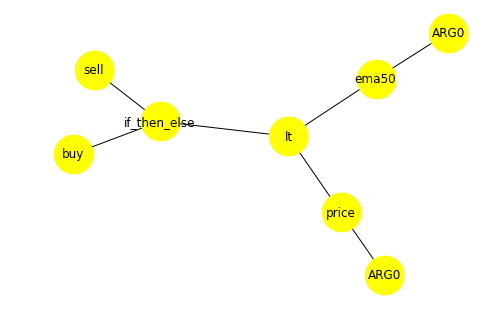

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 14:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 2432926829.268293 DOGE 	 (1 DOGE = 0.00000041 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 14:00:00 rsi_value=None
2018-04-09 15:00:00  	 OrderType.SELL   	 cash_balance ->        970.74 BTC 	 currency_balance -> -2432926829.268293 DOGE 	 (1 DOGE = 0.00000040 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-09 15:00:00 rsi_value=None
2018-04-09 17:00:00  	 OrderType.BUY    	 cash_balance ->       -970.74 BTC 	 currency_balance -> 2361734049.672814 DOGE 	 (1 DOGE = 0.00000041 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 17:00:00 rsi_value=None
2018-04-09 18:00:00  	 OrderType.SELL   	 cash_balance ->        94

Benchmark backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-09 14:00:00
--
--
2018-04-09 14:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 2432926829.268293 DOGE 	 (1 DOGE = 0.00000041 BTC ), slippage = 0.00
   signal: None
2018-06-01 00:00:00  	 OrderType.SELL   	 cash_balance ->       1116.35 BTC 	 currency_balance -> -2432926829.268293 DOGE 	 (1 DOGE = 0.00000046 BTC ), slippage = 0.00
   signal: None
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 2
End cash: 1116.35 BTC
End crypto: 0.000000 DOGE
End price: 4.6e-07
Total value invested: 1000 BTC
Total value after investment: 1116.35 BTC (+11.63%)
Profit: 116.35 BTC
Total value invested: 6723066.53 USDT (conversion on 2018-04-09 14:00:00)
Total value after investment: 8355868.34 USDT (+24.29%) (conversion on 2018-06-01 00:00:00)
Profit: 1632801.81 USDT

Additional stats:
  Max drawdown: -0.3888888888888885
  Max drawdown d

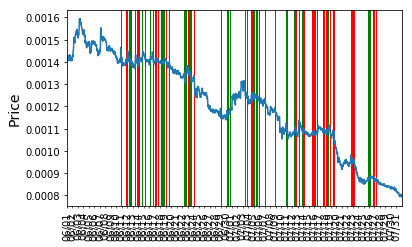

String representation:
if_then_else(lt(price(ARG0), ema50(ARG0)), sell, buy)



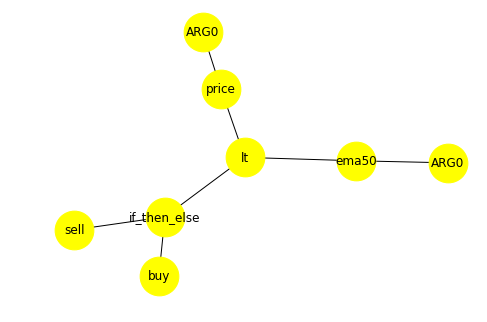

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-10 19:04:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 680826.957335 OMG 	 (1 OMG = 0.00146513 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-10 19:04:00 rsi_value=None
2018-06-10 20:08:00  	 OrderType.SELL   	 cash_balance ->        957.12 BTC 	 currency_balance -> -680826.957335 OMG 	 (1 OMG = 0.00140935 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-06-10 20:08:00 rsi_value=None
2018-06-11 17:05:00  	 OrderType.BUY    	 cash_balance ->       -957.12 BTC 	 currency_balance -> 676222.750117 OMG 	 (1 OMG = 0.00141186 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-11 17:05:00 rsi_value=None
2018-06-11 18:05:00  	 OrderType.SELL   	 cash_balance ->        948.93 BTC 	 currenc

Benchmark backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-08 17:04:00
--
--
2018-06-08 17:04:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 678216.172481 OMG 	 (1 OMG = 0.00147077 BTC ), slippage = 0.00
   signal: None
End time: 2018-08-01 00:00:00

Summary
--
Number of trades: 1
End cash: 0.00 BTC
End crypto: 678216.172481 OMG
End price: 0.00079397
Total value invested: 1000 BTC
Total value after investment: 537.14 BTC (-46.29%)
Profit: -462.86 BTC
Total value invested: 7646000.00 USDT (conversion on 2018-06-08 17:04:00)
Total value after investment: 4138813.53 USDT (-45.87%) (conversion on 2018-08-01 00:00:00)
Profit: -3507186.48 USDT

Additional stats:
  Max drawdown: -0.4617812098424643
  Max drawdown duration: 5262360.0
  Sharpe ratio: -0.7980847534983608
  Alpha: nan
  Beta: nan
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair 

In [7]:
best_overall = best_individuals_across_variants_and_datasets.iloc[1]
evaluations = best_overall.evaluations
for evaluation in evaluations:
    e._print_individual_info(best_overall.individual, evaluation)

### Let's see its performance on the validation set...

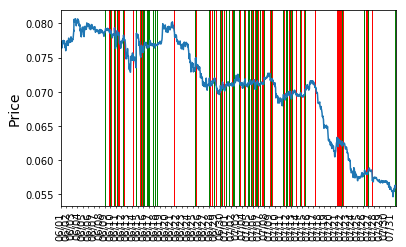

String representation:
if_then_else(lt(price(ARG0), ema50(ARG0)), sell, buy)



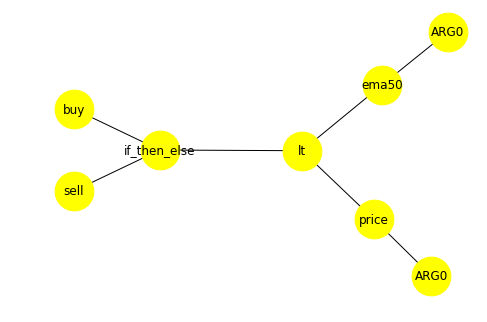

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-09 02:04:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance ->  12635.334247 ETH 	 (1 ETH = 0.07894528 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-09 02:04:00 rsi_value=None
2018-06-09 18:04:00  	 OrderType.SELL   	 cash_balance ->        995.41 BTC 	 currency_balance -> -12635.334247 ETH 	 (1 ETH = 0.07897725 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-06-09 18:04:00 rsi_value=None
2018-06-10 01:04:00  	 OrderType.BUY    	 cash_balance ->       -995.41 BTC 	 currency_balance ->  12551.176280 ETH 	 (1 ETH = 0.07910977 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-10 01:04:00 rsi_value=None
2018-06-10 02:04:00  	 OrderType.SELL   	 cash_balance ->        984.75 BTC 	 currency

In [8]:
evaluation = e._build_evaluation_object(best_overall.individual, best_overall.variant, e.validation_data[0])
e._print_individual_info(best_overall.individual, evaluation)

In [9]:
perf = e.evaluate_individual_on_data_collection(best_overall.individual, best_overall.variant, e.training_data)
perf

,abc_negative_cache_version,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
0,54.0,-0.025242,4.700516,4.700516,0.564612,BTC,889.803623,USDT,0.000000e+00,7.450000e+03,1.527811e+09,889.803623,0.000000e+00,BTC,7.450000e+03,1.527811e+09,889.803623,8.898036e+02,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,[<deap.gp.Primitive object at 0x00000292B69445...,0.166562,-0.003323,0.166562,-0.257834,3182400.0,0.055706,-0.011978,0.000170,0.004758,-0.044473,-0.044473,39.0,39.0,7.0,32.0,78.0,7.0,39.0,78.0,32.0,0.179487,-110.196377,-11.019638,-11.019638,-1.101964e+02,60.0,-0.194031,0.0,0.0,1000.0,0.0,1.522541e+09,1000.0,1000.0,0.060772,0.010157,0.037712,0.0,0.0025,BTC,0.0
1,54.0,-0.382788,11.634848,24.286563,0.532406,DOGE,0.000000,BTC,2.654125e+08,4.600000e-07,1.527811e+09,0.000000,2.654125e+08,DOGE,4.600000e-07,1.527811e+09,121.784546,9.138419e+05,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,[<deap.gp.Primitive object at 0x00000292B69445...,0.232206,-0.002500,0.232206,-0.903902,3607200.0,0.095827,-0.022926,-0.018128,0.015636,-0.040865,-0.040865,99.0,100.0,4.0,95.0,199.0,4.0,99.0,199.0,95.0,0.040404,-878.215454,-87.821545,-86.794192,-6.006158e+06,60.0,-1.961679,0.0,0.0,1000.0,0.0,1.522541e+09,1000.0,6920000.0,0.089296,0.006992,0.030263,0.0,0.0025,DOGE,0.0
2,54.0,-0.122365,-46.286291,-45.869559,0.318667,OMG,403.708330,BTC,0.000000e+00,7.939700e-04,1.533078e+09,403.708330,0.000000e+00,OMG,7.939700e-04,1.533082e+09,403.708330,3.128061e+06,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,[<deap.gp.Primitive object at 0x00000292B69445...,0.043107,-0.000944,0.043107,-0.596292,4862760.0,0.023540,-0.012924,-0.011767,0.003974,-0.040477,-0.040477,63.0,63.0,2.0,61.0,126.0,2.0,63.0,126.0,61.0,0.031746,-596.291670,-59.629167,-58.208936,-4.356939e+06,60.0,-2.049614,0.0,0.0,1000.0,0.0,1.527811e+09,1000.0,7485000.0,0.019567,0.008012,0.010732,0.0,0.0025,OMG,0.0


In [10]:
doge = DogeDNACanvas(best_overall.individual,"container")
HTML(doge.create_container())

In [11]:
Javascript(doge.show())

<IPython.core.display.Javascript object>

### Random thoughts
* perhaps a great doge baby would be found in more generations
* when the market is bearish, some top performing strategies produce no trades (bug or feature?)
* in bullish markets, we see babies that sell and then buy again immediately - unrealistic
* keep reseeding initial population until some individual with good fitness is found 
* alternative: seed initial population with good individuals (e.g. RSI strategy, etc.) 
* compress babies by evaluating expressions within them (for instance 'if False')
* overfitting should be solved by evaluating babies over different time periods / currencies?
